In [11]:
from pandas_datareader import data, wb
from datetime import datetime

start = datetime(2010, 1, 1)

end = datetime(2013, 1, 27)

f=data.DataReader("F", 'yahoo', start, end)

f.ix['2010-01-04']

Open         1.017000e+01
High         1.028000e+01
Low          1.005000e+01
Close        1.028000e+01
Volume       6.085580e+07
Adj Close    8.418735e+00
Name: 2010-01-04 00:00:00, dtype: float64

(734138.0, 736380.0)

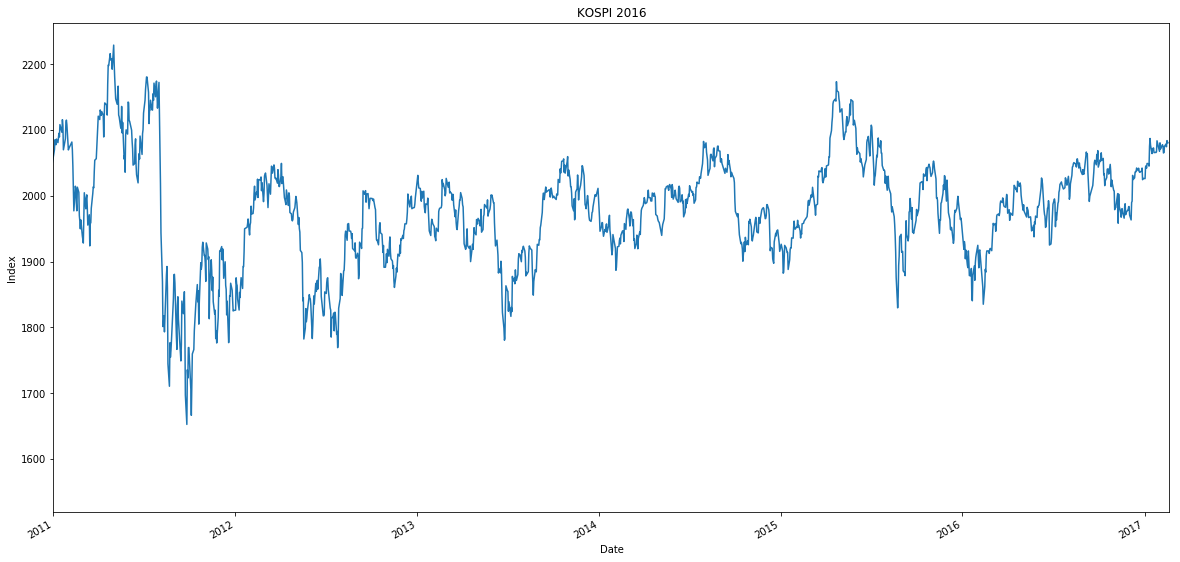

In [1]:
from pandas_datareader import data, wb
from datetime import datetime, date
import matplotlib.pyplot as plt

start = datetime(2011,1,1)
end = date.today()

# 구글에서 코스피 지수를 받는 예시를 살펴보자.
# 기본적으로 기간이 설정되지 않으면, 2010년 01월 01일을 기준으로 오늘까지의 데이터를 받아온다.
df = data.DataReader("KRX:KOSPI", "google")


# 만약, 2016년의 데이터만 받아오고 싶다면,
# 다음과 같이 기간을 설정해줄 수 있다.
# df = data.DataReader("KRX:KOSPI", "google", start, end)
# df = data.get_data_google("KRX:KOSPI")  

# yahoo
# df = data.DataReader("^KS11", "yahoo")  
# df = data.get_data_yahoo("^KS11")  

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)
ax = df.Close.plot()

ax.set_title("KOSPI 2016")  
ax.set_ylabel("Index")  
ax.set_xlim(start.strftime("%Y-%m-%d"), end.strftime("%Y-%m-%d"))  

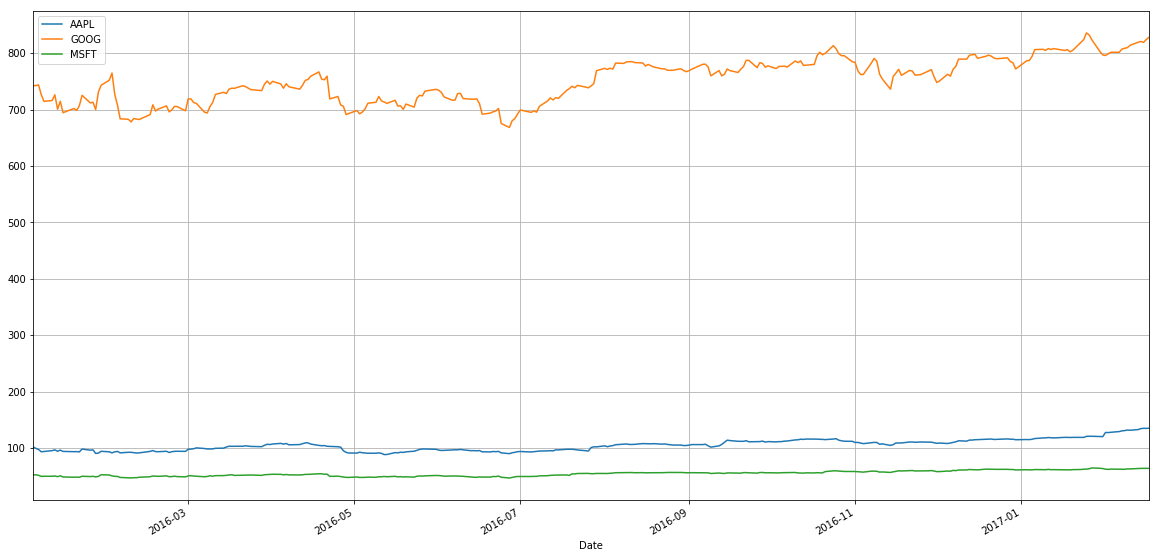

In [2]:
import pandas as pd
from pandas_datareader import data, wb
from datetime import datetime, date
import matplotlib.pyplot as plt

# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime(2016,1,1)
end = date.today()

apple = data.DataReader("AAPL", "yahoo", start, end)
microsoft = data.DataReader("MSFT", "yahoo", start, end)
google = data.DataReader("GOOG", "yahoo", start, end)

# Below I create a DataFrame consisting of the adjusted closing price of these stocks, first by making a list of these objects and using the join method
stocks = pd.DataFrame({"AAPL": apple["Adj Close"],
                      "MSFT": microsoft["Adj Close"],
                      "GOOG": google["Adj Close"]})

stocks.head()

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

stocks.plot(grid = True)